<a href="https://colab.research.google.com/github/Stanlee-Sam/Support-Vector-Machines-Checkpoint/blob/main/Support_Vector_Machines_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from ydata_profiling import ProfileReport

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Electric_cars_dataset.csv')
df.head(20)


,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78
5,EV49859,KMHE24L10G,Clark,VANCOUVER,WA,98683.0,2016.0,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,34600,18.0,110121371,POINT (-122.510748 45.603727),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,16.365
6,EV35778,1G1FZ6S07L,King,SEATTLE,WA,98107.0,2020.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,36.0,142015072,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),31.5
7,EV53121,5YJSA1E22G,Spokane,SPOKANE,WA,99224.0,2016.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6.0,349565044,POINT (-117.505436 47.633834),MODERN ELECTRIC WATER COMPANY,65
8,EV46881,1N4BZ0CP9H,King,BOTHELL,WA,98011.0,2017.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,1.0,327624048,POINT (-122.197147 47.757791),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),19
9,EV32004,1N4BZ0CP4G,King,KENMORE,WA,98028.0,2016.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,46.0,148960990,POINT (-122.246193 47.755504),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),27


In [ ]:
#display the dataset general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [ ]:
df.describe(include = 'all')

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
count,64353,64353,64349,64344,64342,64347.000000,64346.000000,64349,64340,64353,64353,64353.000000,64353.000000,64184.000000,6.435300e+04,63843,63631,64353
unique,64353,5644,139,544,38,NaN,NaN,34,107,2,3,NaN,NaN,NaN,NaN,668,68,210
top,EV11120,5YJYGDEE9M,King,SEATTLE,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69
freq,1,340,33552,11887,64168,NaN,NaN,27903,13138,47869,39948,NaN,NaN,NaN,NaN,1712,22555,4816
mean,NaN,NaN,NaN,NaN,NaN,98143.452888,2018.186212,NaN,NaN,NaN,NaN,106.948985,2524.990754,29.951904,1.972905e+08,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2856.064329,2.726742,NaN,NaN,NaN,NaN,104.093919,12402.895104,14.661124,1.069466e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,745.000000,1993.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.385000e+03,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,98052.000000,2017.000000,NaN,NaN,NaN,NaN,14.000000,0.000000,19.000000,1.372865e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,98121.000000,2018.000000,NaN,NaN,NaN,NaN,73.000000,0.000000,34.000000,1.753776e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,98370.000000,2021.000000,NaN,NaN,NaN,NaN,215.000000,0.000000,43.000000,2.299039e+08,NaN,NaN,NaN


In [ ]:
df = df.drop(['ID', 'VIN (1-10)', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'State', 'County', 'City', 'ZIP Code', 'Legislative District','Vehicle Location', 'Electric Utility', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'], axis=1)

In [ ]:
#check for missing values
df.isnull().sum()

,0
Model Year,7
Make,4
Model,13
Electric Vehicle Type,0
Electric Range,0
Base MSRP,0
Expected Price ($1k),0


In [ ]:
# Fill missing values
df['Model Year'].fillna(df['Model Year'].median(), inplace=True)
df['Make'].fillna(df['Make'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)


/tmp/ipython-input-1748856727.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Model Year'].fillna(df['Model Year'].median(), inplace=True)
/tmp/ipython-input-1748856727.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
#check for missing values
df.isnull().sum()

,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Electric Range,0
Base MSRP,0
Expected Price ($1k),0


In [ ]:
df.duplicated().sum()

np.int64(63978)

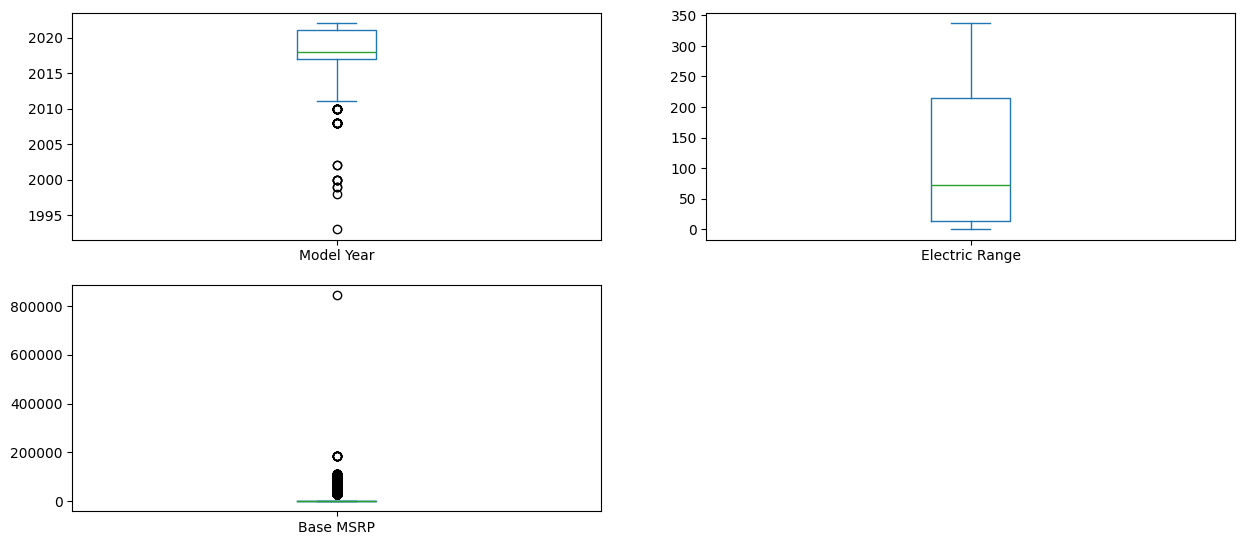

In [ ]:
# check for outliers by plotting box plots
df.plot(kind='box', subplots=True, layout=(3,2), figsize=(15,10))
plt.show()

In [ ]:
#handle outliers
Q1 = df['Base MSRP'].quantile(0.25)
Q3 = df['Base MSRP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Base MSRP'] < lower_bound) | (df['Base MSRP'] > upper_bound)]
print(outliers)

       Model Year      Make                  Model  \
5          2016.0   HYUNDAI  SONATA PLUG-IN HYBRID   
24         2018.0       KIA                SOUL EV   
46         2019.0  CHRYSLER               PACIFICA   
72         2016.0   HYUNDAI  SONATA PLUG-IN HYBRID   
82         2019.0    SUBARU   CROSSTREK HYBRID AWD   
...           ...       ...                    ...   
64208      2014.0     TESLA                MODEL S   
64224      2018.0       KIA                SOUL EV   
64232      2012.0     TESLA                MODEL S   
64295      2019.0       KIA          NIRO ELECTRIC   
64341      2016.0   HYUNDAI  SONATA PLUG-IN HYBRID   

                        Electric Vehicle Type  Electric Range  Base MSRP  \
5      Plug-in Hybrid Electric Vehicle (PHEV)              27      34600   
24             Battery Electric Vehicle (BEV)             111      33950   
46     Plug-in Hybrid Electric Vehicle (PHEV)              32      39995   
72     Plug-in Hybrid Electric Vehicle (PHEV)  

In [ ]:
import numpy as np

df['Base MSRP'] = np.where((df['Base MSRP'] < lower_bound) | (df['Base MSRP'] > upper_bound), df['Base MSRP'].median(), df['Base MSRP'])


In [ ]:
#handle outliers
Q1 = df['Model Year'].quantile(0.25)
Q3 = df['Model Year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Model Year'] < lower_bound) | (df['Model Year'] > upper_bound)]
print(outliers)

       Model Year    Make     Model           Electric Vehicle Type  \
1142       2008.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
1183       2010.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
1455       1993.0   DODGE   CARAVAN  Battery Electric Vehicle (BEV)   
2072       2008.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
3767       2008.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
5617       2000.0    FORD    RANGER  Battery Electric Vehicle (BEV)   
7234       2010.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
7287       2000.0    FORD    RANGER  Battery Electric Vehicle (BEV)   
9949       2010.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
10616      2008.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
11385      2008.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
12207      2008.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
16737      2008.0   TESLA  ROADSTER  Battery Electric Vehicle (BEV)   
28711 

In [ ]:
df['Model Year'] = np.where((df['Model Year'] < lower_bound) | (df['Model Year'] > upper_bound), df['Model Year'].median(), df['Model Year'])


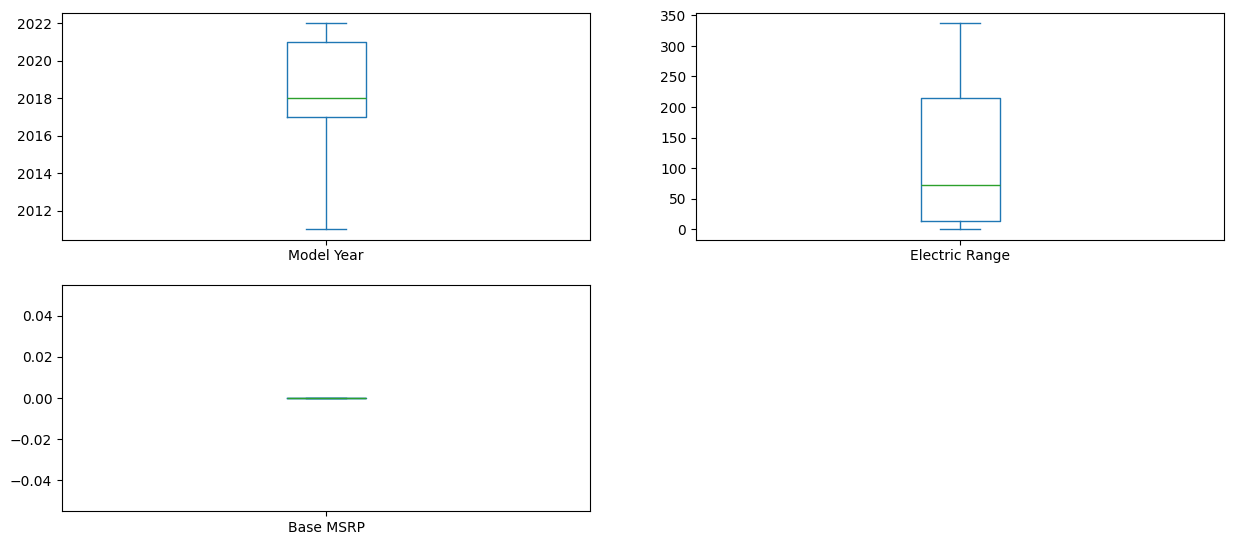

In [ ]:
# check for outliers by plotting box plots
df.plot(kind='box', subplots=True, layout=(3,2), figsize=(15,10))
plt.show()

In [ ]:
from ydata_profiling import ProfileReport

report = ProfileReport(df, title = 'Car Report', explorative = True)
report.to_file('Car_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:01<00:00,  5.07it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Encode
df = pd.get_dummies(df, columns=['Make', 'Model', 'Electric Vehicle Type'], drop_first=True)


In [ ]:
df['Expected Price ($)'] = df['Expected Price ($1k)'] * 1000
df.drop(columns=['Expected Price ($1k)'], inplace=True)


Support Vector Machine

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Columns: 144 entries, Model Year to Expected Price ($)
dtypes: bool(140), float64(2), int64(1), object(1)
memory usage: 10.6+ MB


In [ ]:
df.head(20)

,Model Year,Electric Range,Base MSRP,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,...,Model_X5,Model_XC40,Model_XC60,Model_XC60 AWD,Model_XC60 AWD PHEV,Model_XC90,Model_XC90 AWD,Model_XC90 AWD PHEV,Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Expected Price ($)
0,2020.0,308,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5050505050505050505050505050505050505050505050...
1,2011.0,73,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1515151515151515151515151515151515151515151515...
2,2015.0,81,0.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1818181818181818181818181818181818181818181818...
3,2013.0,38,0.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,33.933.933.933.933.933.933.933.933.933.933.933...
4,2019.0,238,0.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,41.7841.7841.7841.7841.7841.7841.7841.7841.784...
5,2016.0,27,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,16.36516.36516.36516.36516.36516.36516.36516.3...
6,2020.0,259,0.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,31.531.531.531.531.531.531.531.531.531.531.531...
7,2016.0,210,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6565656565656565656565656565656565656565656565...
8,2017.0,107,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1919191919191919191919191919191919191919191919...
9,2016.0,84,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2727272727272727272727272727272727272727272727...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#prepare the data
x = df.drop('Expected Price ($)', axis=1)
y = df['Expected Price ($)']

In [ ]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
# Define pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(class_weight='balanced'))
])

In [ ]:
#define parameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm__C': [0.5, 1, 2, 5],
    'svm__kernel': ['rbf', 'poly', 'sigmoid'],
    'svm__gamma': ['scale', 'auto']
}

#perform grid search
grid = GridSearchCV(svm_pipeline, param_grid, cv=5)
grid.fit(x_train, y_train)

print('Best Parameters:',grid.best_params_)
print('Best CV Score:',grid.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#use the best estimator for prediction
best_model = grid.best_estimator_

In [ ]:
#make predictions
training_predictions = best_model.predict(x_train)
print('Training predictions: ',training_predictions)
print()

testing_predictions = best_model.predict(x_test)
print('Testing predictions:',testing_predictions)




In [ ]:
#evaluate the model
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, testing_predictions))
print("\nClassification Report:")
print(classification_report(y_test, testing_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, testing_predictions))